# Neural networks


Language models which use frequency based approaches as shown in the last chapter come along with potential pitfalls. For instance, the bag-of-words approach produces sparse high-dimensional vectors which has no further information about the meaning or context of the original text. Dictionary based approaches depend on the dictionary used and also lose meaning and contextual information. In the remainder of this course, we are going to learn about language models that aim to tackle these issues. The models we are going to use usually create numerical representations of words and documents that capture semantic meaning. This means numerical representations are similar if the meaning of words and documents is similar and vice versa. To learn about the meaning of words and documents parametric statistical models are used. These models need to be trained on corpora. The architecture of these models is developed using neural networks. This is why we first discuss neural networks in general in this chapter. Please also note that not all language models use neural networks, however, all models used from now on. Other modeling approaches rely upon matrix decompositions of document term matrices or other forms of probablistic modeling of text generation. 

## The building blocks of neural networks

Each neural network has so called layers. The first layer which receives input data is called the input layer, the last layer in a neural network returns processed input and is called the output layer. In between those two layers hidden layers can be used. Each layer consists of a number of neurons which is defined by the user. Furthermore, the output of each layer is activated by activation functions. 

First, let us take a look how a neuron is determined using neurons from the previous layer for a single observation in the data set. The input data is given by:

$$
\boldsymbol{x} = 
\begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_{p_1} \\
\end{pmatrix}
$$

where the index $j = 1, ..., p_1$ represents the number of input variables (input neurons) in the first layer $p_{l=1}$. For the sake of consistency, let us denote the input variables by $\boldsymbol{x} = \boldsymbol{h}^{(1)}$, where the $(1)$ in the superscript signals that these are the neurons from the first layer. The first step to determine the neuron in the next layer ist to aggregate the neurons of the previous layer in a weighted fashion. This is called affine map:

$$
z^{(1)} = \boldsymbol{h}^{(1), T} \boldsymbol{w}^{(1)}  + b^{(1)} = w_{1}^{(1)} h_{1}^{(1)} + w_{2}^{(1)} h_2^{(1)} + ... + w_{p_{1}}^{(1)} h_{p_{1}}^{(1)} + b^{(1)}
$$

The output of this transformation is used as input for an activation function $g$. Various activation functions are used for neural networks. Popular examples are 

| Name | Function  |
|- | - |
| Identity | $g(z) = z$ |
| Relu | $g(z) = \max (z, 0)$ |
| Sigmoid | $g(z) = \frac{1}{1 + e^{-z}} $ |

See the output below for their visualization.

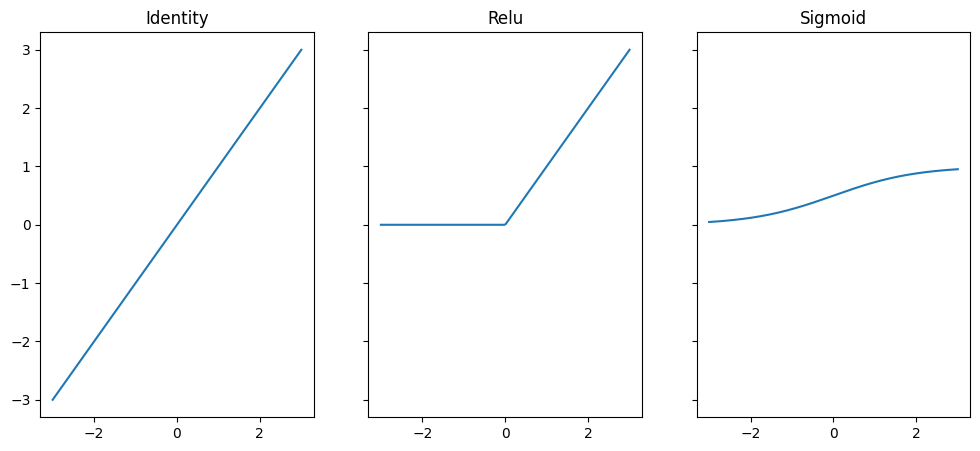

In [1]:
import numpy as np
import matplotlib.pylab as plt


z = np.linspace(-3, 3, 200)

fig, axs = plt.subplots(1, 3, figsize = (12, 5), sharex=True, sharey=True)
axs[0].plot(z, z)
axs[0].set_title("Identity")
axs[1].plot(z, np.maximum(z, 0))
axs[1].set_title("Relu")
axs[2].plot(z, (1 + np.exp(-z))**(-1))
axs[2].set_title("Sigmoid")
plt.show()

The result of the activation function is the hidden neuron for the next layer. Thus, to create a single neuron for the next layer, we use:

$$
h^{(2)} = g(z^{(1)}) = g \left(w_{1}^{(1)} h_{1}^{(1)} + w_{2}^{(1)} h_2^{(1)} + ... + w_{p_{1}}^{(1)} h_{p_{1}}^{(1)} + b^{(1)}\right)
$$

If we want to generate more than one hidden neuron, we need different parameters. Let us introduce the index $k$ for this purpose:

$$
h_k^{(2)} = g(z_k^{(2)}) = g \left(w_{1k}^{(1)} h_{1}^{(1)} + w_{2k}^{(1)} h_2^{(1)} + ... + w_{p_{1}k}^{(1)} h_{p_{1}}^{(1)} + b_k^{(1)}\right)
$$

As this operation is used in general from layer $l-1$ to layer $l$, we can write:

$$
h_k^{(l)} = g(z_k^{(l)}) = g \left(w_{1k}^{(l-1)} h_{1}^{(l-1)} + w_{2k}^{(l-1)} h_2^{(l-1)} + ... + w_{p_{l-1}k}^{(l-1)} h_{p_{l-1}}^{(l-1)} + b_k^{(l-1)}\right) = g \left( \boldsymbol{h}^{(l-1), T} \boldsymbol{w}_k^{(l-1)} + b_k^{(l-1)} \right) 
$$

Given a data set with $n$ observations, we can use the expression:

$$
\boldsymbol{H}^{(l)} = g \left( \boldsymbol{H}^{(l-1)} \boldsymbol{W}^{(l-1)}  + \boldsymbol{b}^{(l-1)} \right)
$$

Here, the dimensions are as follow:

* $\boldsymbol{H}^{(l-1)} \in \mathbb{R}^{n \times p_{l-1}}$
* $\boldsymbol{H}^{(l)} \in \mathbb{R}^{n \times p_{l}}$
* $\boldsymbol{W}^{(l-1)} \in \mathbb{R}^{p_{l-1} \times p_{l}}$
* $\boldsymbol{b}^{(l-1)} \in \mathbb{R}^{p_{l}}$

and the operation $\boldsymbol{H}^{(l-1)} \boldsymbol{W}^{(l-1)} + \boldsymbol{b}^{(l-1)}$ is defined in a way such that the vector $\boldsymbol{b}^{(l-1)}$ is added to each column of the matrix $\boldsymbol{H}^{(l-1)} \boldsymbol{W}^{(l-1)}$ (this is called broadcasting).

These operations are repeated for as many layers as desired by the user. For instance, let us take a look how data would be processed for a neural network with one hidden layer, two hidden neurons and one neuron in the output layer. Let us further focus on the processing of a single observation and assume that the network receives realizations of three input variables $x_1, x_2, x_3$ in the input layer and only the identity function is used for activation in each layer.

The input neurons are $h_1^{(1)} = x_1, h_2^{(1)} = x_2, h_3^{(1)} = x_3$. The hidden neurons for the next layer are calculated by:

$$
\begin{align}
\boldsymbol{h}^{(2), T} = g \left(
\begin{pmatrix}
h_1^{(1)} & h_2^{(1)} & h_3^{(1)} \\
\end{pmatrix}
\begin{pmatrix}
w_{11}^{(1)} & w_{12}^{(1)}  \\
w_{21}^{(1)} & w_{22}^{(1)}  \\
w_{31}^{(1)} & w_{32}^{(1)}  \\
\end{pmatrix}  +
\begin{pmatrix}
b_{1}^{(1)}  \\
b_{2}^{(1)}  \\
\end{pmatrix} 
\right) = \\ =
\begin{pmatrix}
h_1^{(1)} w_{11}^{(1)} + h_2^{(1)} w_{21}^{(1)} + h_3^{(1)} w_{31}^{(1)}  & 
h_1^{(1)} w_{12}^{(1)} + h_2^{(1)} w_{22}^{(1)} + h_3^{(1)} w_{32}^{(1)} \\
\end{pmatrix} +
\begin{pmatrix}
b_{1}^{(1)}  \\
b_{2}^{(1)}  \\
\end{pmatrix} =  \\ =
\begin{pmatrix}
h_1^{(1)} w_{11}^{(1)} + h_2^{(1)} w_{21}^{(1)} + h_3^{(1)} w_{31}^{(1)} + b_{1}^{(1)}   & 
h_1^{(1)} w_{12}^{(1)} + h_2^{(1)} w_{22}^{(1)} + h_3^{(1)} w_{32}^{(1)} + b_{2}^{(1)} \\
\end{pmatrix} +
\end{align}
$$

To produce the output of the neural network, we further process these neurons through the second (output) layer by:
 
$$
h^{(3)} = g \left(
\begin{pmatrix}
h_1^{(2)} & h_2^{(2)} \\
\end{pmatrix} 
\begin{pmatrix}
w_{1}^{(2)} \\ w_{2}^{(2)}  \\
\end{pmatrix} +
b^{(2)}
\right) = 
w_{1}^{(2)} h_1^{(2)} + w_{2}^{(2)} h_2^{(2)} + b^{(2)}
$$

The only thing which is fixed here are the input values $h_1^{(1)} = x_1, h_2^{(1)} = x_2, h_3^{(1)} = x_3$. All other values $\boldsymbol{W}^{(1)}, \boldsymbol{b}^{(1)}, \boldsymbol{W}^{(2)}, \boldsymbol{b}^{(2)}$ are parameters which need to be trained for the model. The number of parameters is determined by the number of hidden neurons which we set for every layer. The more hidden neurons we would like to use, the higher the number of parameters which needs to be trained. What we see in the example above is what is called a forward pass which describes how the input data is processed through the network. Note that there are no real limits regarding the architecture. For instance you can also define a neural network which produces more than one neuron in the output layer. However, the question that remains is how are the parameters trained?

In order to train the parameters we need another function which is called loss or cost function and supposed to be minimized by adjusting parameters accordingly. The choice of the loss function depends on the task which is supposed to be tackled with the neural network. Popular examples for such tasks belong to the field of supervised learning and are regression or classification problems. Let us take a look at these examples to dig deeper into the training process of a neural network.

### Regression task

A regression model is supposed to make predictions for a numerical values, usually a real valued number. Given information by feature variables (which are also called independent or predictor variables), the model processes this information to make predictions for the target variable (also called dependent variable). Generally, this can be written by $f_{\boldsymbol{\theta}}\left(\boldsymbol{x}\right)$, where $f$ is the function which processes feature variables $\boldsymbol{x}$. Usually the model predictions depend on parameters which are collected in the set $\boldsymbol{\theta}$. An easy example is the linear regression model. The parameters are $\boldsymbol{\theta}= \lbrace w_1, ..., w_p, b \rbrace$, and, the function is defined by:

$$
f_{\boldsymbol{\theta}}\left(\boldsymbol{x}_i\right) = w_1 x_{i1} + ... + w_p x_{ip} + b = \boldsymbol{w} \boldsymbol{x}_i + b = \hat{y}_{i, \boldsymbol{\theta}}
$$

If we want to tackle a regression task with a neural network, the output activation is supposed to be the identity function to create a real valued number. Besides, all components of the neural network can be set by the user as desired. To train the parameters of a neural network (or other models for regression tasks), we can choose among different loss functions, however, the most common is the (average) sum of squared deviations.

$$
L \left(\boldsymbol{y}, \boldsymbol{\hat{y}}_{\boldsymbol{\theta}}\right) = \sum_i \left(y_i - \hat{y}_{i, \boldsymbol{\theta}} \right)^2 
$$

with $\hat{y}_{i, \boldsymbol{\theta}} =  f_{\boldsymbol{\theta}}\left(\boldsymbol{x}_i\right) $ being the prediction for $y_i$. Thus, the loss function value for a neural network is smaller if model predictions are close to realizations on average. In essence, we face an optimization problem to train all model parameters which is:

$$
\min_{\boldsymbol{\theta}} L \left(\boldsymbol{y}, \boldsymbol{\hat{y}}_{\boldsymbol{\theta}}\right)
$$

and, given data, we can use the solution to the optimization:

$$
\hat{\boldsymbol{\theta}} = \argmin_{\boldsymbol{\theta}} L \left(\boldsymbol{y}, \boldsymbol{\hat{y}}_{\boldsymbol{\theta}}\right)
$$

as estimated parameter values. While such a solution is available in closed form for the multiple linear regression model it is not for neural networks, nor is it unique. This is why we usually aim to approximate this solution by numerical optimization techniques. With respect to neural networks, gradient descent techniques are very popular. We are going to take a look at this later, but, first let us take a look at classification tasks to examine some similarities regarding the architecture and training of neural networks.

### Classification tasks

In case of classification tasks, the model is supposed to predict categories of a target variable. If only two categories exist, this is called binary classification, for more than two categories, we speak about multi-class classification. Usually the categories are disjoint, meaning, only one of the categories can occur at a time. If more categories can occur for one observation, it is called multi-label classification.

Usually, categories are encoded into numbers or by one-hot-vector encoding. While the original observation is a unique label, e.g., "buy", the numerical representation is $y = 1$, and after one-hot encoding it is $\begin{pmatrix} 0 & 1 \end{pmatrix}$. In general, one-hot-vectors are vectors with dimensionality being equal to the number of categories and a $1$ at the position which represents the corresponding category. For instance, if the original target variable has the categories "buy", "not buy", we can first encode it in numbers like $0, 1$ or $1, 2$ or to one-hot-vectors $\begin{pmatrix} 0 & 1 \end{pmatrix}$, $\begin{pmatrix} 1 & 0 \end{pmatrix}$. For binary classification, one usually uses a numerical dummy encoding $0, 1$ with $1$ representing the category of interest. One-hot-vectors are mostly used for classification with more than two categories. For all classification models, we usually predict the probability for being a specific category instead of a direct category prediction. With respect to neural networks, this determines the choice of the output activation function. 

Given a binary classification task, one uses the sigmoid function in the output layer. This function takes a real-valued number $z$ and maps it to the numerical range $\left(0, 1\right)$. The easiest version of this model is represented by the logistic regression model, which can be considered as a special form for a neural network without hidden layer and the sigmoid activation. This is basically the linear regression model whose output is inserted in the sigmoid function:

$$
f_{\boldsymbol{\theta}}\left(\boldsymbol{x}_i\right) = \frac{1}{1 + e^{- \left(w_1 x_{i1} + ... + w_p x_{ip} + b\right)}} = \frac{1}{1 + e^{-  \left( \boldsymbol{w} \boldsymbol{x}_i + b \right) }} = \hat{y}_{i, \boldsymbol{\theta}}
$$

Here, $\hat{y}_{i, \boldsymbol{\theta}}$ represents the probability for observation $i$ to fall into category $1$. Note that a neural network is the same with arbitrary hidden layers between the input and the output layer. To train the parameters for a binary classification model, we need a loss function which is lower if probability predictions are in line with actual categorical observations. This means if $y=0$ the model is supposed to predict a small value for $\hat{y}_{i, \boldsymbol{\theta}}$ and if $y=1$, $\hat{y}_{i, \boldsymbol{\theta}}$ should be a high value close towards $1$. We should mention that a low value for $\hat{y}_{i, \boldsymbol{\theta}}$ is a high probability prediction for $y=0$ as $P\left(y = 0\right) = 1 - \hat{y}_{i, \boldsymbol{\theta}}$. A popular loss function is the cross-entropy. The model is considered to provide better predictions the lower:

$$
L \left(\boldsymbol{y}, \boldsymbol{\hat{y}}_{\boldsymbol{\theta}}\right) = - \sum_i y_i \log \left(\hat{y}_{i, \boldsymbol{\theta}}\right) + \left(1 - y_i\right) \log \left(1 - \hat{y}_{i, \boldsymbol{\theta}}\right)
$$

For a better understanding of the intuition of this loss function, take a look in output below. We plot the value of $-\log(p)$ for $p \in (0, 1)$. As $-\log(p)$ is strictly monotonic decreasing, smaller loss values result for observations with high probability predictions for the realized category.

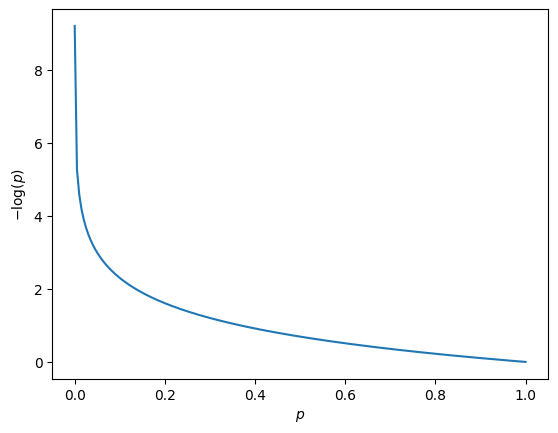

In [2]:
import numpy as np
import matplotlib.pylab as plt


p = np.linspace(0.0001, 0.9999, 200)
plt.plot(p, -np.log(p))
plt.xlabel(r"$p$")
plt.ylabel(r"$-\log(p)$")
plt.show()

While the loss function is quite similar for multi-class classification, we need multiple outputs. Given $K$ categories, one usually defines the network to produce $K$ output values for each observation where each output value represents the probability for observation $i$ being category $K = k$, $\pi_{i, k} = P(y_i = k)$. To achieve this, we need a set of parameters for every category and the output values need to be normalized as probabilities, i.e., $\pi_{i, k} > 0, \sum_k \pi_{i, k} = 1 $. Again, we skip a hidden layer and take a look at the easiest version for such a model. Given $p$ input features $\boldsymbol{x}_i$ for observation $i$, we first generate $K$ real valued numbers by: 

$$
f_{\boldsymbol{\theta}} \left(\boldsymbol{x}_i\right) = 
\begin{pmatrix}
x_{i, 1} & x_{i, 2} & ... & x_{i, p} \\
\end{pmatrix}
\begin{pmatrix}
w_{11} & w_{12} & ... & w_{1K} \\
w_{21} & w_{22} & ... & w_{2K} \\
\vdots & \vdots & \ddots & \vdots \\
w_{p1} & w_{p2} & ... & w_{pK} \\
\end{pmatrix} +
\begin{pmatrix}
b_{1} & b_{2} & ... & b_{p} \\
\end{pmatrix}
= 
\begin{pmatrix}
z_{i, 1} & z_{i, 2} & ... & z_{i, K} \\
\end{pmatrix}
$$

In order to fulfill the requirements for probabilities, $\boldsymbol{z}_i$ is transformed by the softmax function. For every element $k$ of $\boldsymbol{z}_i$, the softmax transformation is given by:

$$
g(z_{i, k}) = \frac{e^{z_{i, k}}}{\sum_l e^{z_{i, l}}} = \pi_{i, k}
$$

Combining both operations gives us a vector with probabilites

$$
\boldsymbol{\pi}_i = 
\begin{pmatrix}
\pi_{i, 1} \\
\pi_{i, 2} \\
\vdots \\
\pi_{i, K}
\end{pmatrix}
$$

Given the input data is one-hot encoded label vectors $ \boldsymbol{y}_i $, where each vector entry is equal to zero except at the position of the actual category, we can use the loss function:

$$
L \left(\boldsymbol{y}, \boldsymbol{\hat{y}}_{\boldsymbol{\theta}}\right) = - \sum_i \log \left( \boldsymbol{\pi}_i^T \boldsymbol{y}_i \right)
$$

This is the same as for the binary classification problem. In essence, the loss value for each observation is the negative value of the log of the probability prediction for its observed category. This means that minimizing the loss function results in a model which on average delivers the highest probabilities for the observed cagegories. 

## Training neural networks

At the moment you should understand that neural networks are basically a combination of matrix and vector operations and (mostly) non-linear function transformations. In addition, each neural network depends on the chosen architecture which is defined by, e.g., setting the number of hidden layers, neurons and the output dimension. To process input information through the network, parameters are used. These parameters are initially set by constant values or they are drawn randomly. However, for a network to fulfill its purpose in the best possible way, parameters are trained based on a data sample. We have seen above that this is done by minimizing a loss function. Usually, analytical solutions are not available for the majority of neural network architectures and we need to rely upon algorithmic optimization schemes. 

Let us refresh some general basics of optimization. Given a function $L: \mathbb{R} \to \mathbb{R}$ (one input - one output value), with $l = L(\theta)$, the local minimum of $L$ is defined as the point $\theta^{*}$ such that all values around $L(\theta^{*})$ are higher if $\theta^{*}$ is changed by an infinitesimally small amount. A global minimum is the set of points with the smallest possible value over the domain of $L$. Due to the duality of optimization, one can translate every maximization problem into a minimization problem by multiplying the function with $-1$. So without the loss of generality, we continue with the discussion of minimization. To find candidates for local or global minima one searches for stationary points. A stationary point is the value of $\theta$ at which the value for the first derivative of $L$ is equal to zero, i.e., $\frac{\partial L}{\partial \theta} = 0$. Stationary points can be either a minimum, maximum or saddle point. To identify the category for every stationary point, one can use the second derivative. These concepts can be used in analogy if we analyze functions with multidimensional input, i.e., $L: \mathbb{R}^p \to \mathbb{R}$ with $l = L\left( \boldsymbol{\theta} \right)$. To us, this is the more relevant scenario as neural networks have multiple parameters, but, for one observation in a data set we determine one loss value. A stationary point for a multidimensional function is defined at the point $\boldsymbol{\theta}$ at which the gradient of $L$ is zero. The gradient is the vector of all partial derivatives:

$$
\nabla_{\boldsymbol{\theta}} L  = 
\begin{pmatrix}
\frac{\partial L}{\partial \theta_1} \\
\vdots \\
\frac{\partial L}{\partial \theta_q} \\
\end{pmatrix}
$$

with $q$ being the number of all parameters. Besides the gradient, one uses the Hessian matrix to check stationary points for the extremum identity. Analytical solutions for minimization problems mostly rely upon the convexity of the function to be optimized. Loss functions which are defined by the usage of neural networks usually are non-convex and exhibit multiple local minima. This is why one has to search for stationary points iteratively. To understand the iterative search called gradient descent, let us take a look at a small and unrealistic example. Given one data point $(x = 2, y = 3)$, we aim to find the parameter $\theta$ which minimizes the loss function $L\left( y, \hat{y}_{\theta} \right) = \left(y - \hat{y}_{\theta}\right)^2$ with $\hat{y}_{\theta} = f_{\theta}(x) = \theta x$. The stationary point can be found by: 

$$
\begin{aligned}
\frac{\partial L}{\partial \theta} = 2 (3 - \theta \cdot 2) \cdot (-2) \stackrel{!}{=} 0 \\
-12 + 8 \cdot \theta = 0 \\
\theta = \frac{3}{2}
\end{aligned}
$$

and with

$$
\frac{\partial^2 L}{\partial^2 \theta} = 8 > 0
$$

we can confirm that $ \theta = \frac{3}{2} $ is a minimum. Now, let us take a look at the loss function in our example and assume for a moment that we are not able to determine the analytical solution.

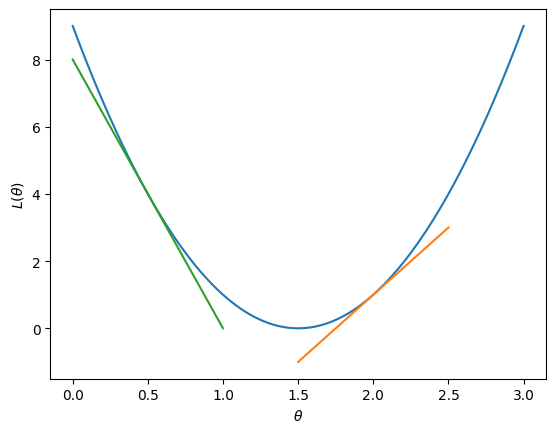

In [3]:
import matplotlib.pylab as plt
import numpy as np

def L(theta): 
    return (3 - theta * 2)**2

def slope(theta): 
    return - 4 * (3 - theta * 2)

   
theta = np.linspace(0, 3, 500)
plt.plot(theta, L(theta))
plt.plot([1.5, 2.5], [L(2) - slope(2) * 0.5, L(2) + slope(2) * 0.5])
plt.plot([0, 1], [L(0.5) - slope(0.5) * 0.5, L(0.5) + slope(0.5) * 0.5])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')
plt.show()

Further, let us assume, we could start with a random guess $\theta^{(0)}$ and remember the first derivative can be illustrated as the tangency at this point and with the slope being equal to the derivative's value at this point. If we start with a value to the right of the actual minimum, $\frac{\partial L}{\partial \theta} > 0$, and, if we start to the left $\frac{\partial L}{\partial \theta} < 0$. $\frac{\partial L}{\partial \theta} > 0$ tells us that increasing $\theta^{(0)}$ by an infinitesimal amount would increase the loss value. As we do not want this, we would decrease $\theta^{(0)}$ with this information. $\frac{\partial L}{\partial \theta} < 0$ tells us that increasing $\theta^{(0)}$ by an infinitesimal amount would decrease the loss value. As we do want this, we would further increase $\theta^{(0)}$ in this scenario. This means, we can use the information of the first derivative to improve our initial guess stepwise. To subsume this, we could do the following iterative process:

1. Start with a random guess: $\theta^{(0)}$
2. Until a condition for termination is fulfilled, repeat:
    1. Determine $\frac{\partial L}{\partial \theta}$
    2. Update the parameter by: $\theta^{(k)} \leftarrow \theta^{(k-1)} - \eta \frac{\partial L}{\partial \theta}$

with $\eta > 0$ representing the learning rate which defines the magnitude of change in the parameter value. Stopping criteria can be, e.g., a fixed number of iterations, if $\frac{\partial L}{\partial \theta} \approx 0 $ or if the value of $L$ can not be reduced by a certain value. Take a look below for the progress of this iterative approach and the impact of $\eta$ in the visualization below.

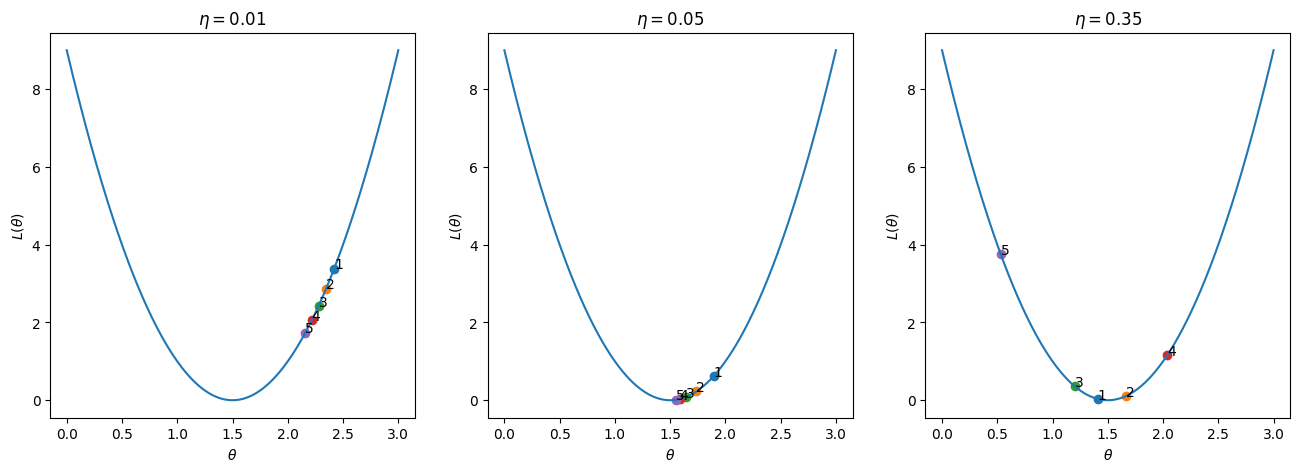

In [4]:
import matplotlib.pylab as plt
import numpy as np

def L(theta): 
    return (3 - theta * 2)**2

def slope(theta): 
    return - 4 * (3 - theta * 2)


fig, axs = plt.subplots(1, 3, figsize = (16, 5))
theta = np.linspace(0, 3, 500)

etas = [0.01, 0.05, 0.35]

theta_guess = 2.5
for i, eta in enumerate(etas):

    axs[i].plot(theta, L(theta))
    
    for k in range(5):
        theta_guess -= eta * slope(theta_guess)
        axs[i].scatter(theta_guess, L(theta_guess))
        axs[i].text(theta_guess, L(theta_guess), f"{k+1}")
    
    axs[i].set_xlabel(r'$\theta$')
    axs[i].set_ylabel(r'$L(\theta)$')
    axs[i].set_title(fr'$\eta = {eta}$')

plt.show()

We observe that the learning rate needs to be treated with care, choosing its value too small leads to a slow and long lasting training process which may not find the local minimum, setting the learning rate too high may overshoot the local minimum and leads the search away from the minimum. In reality, one can examine the impact of the learning rate by setting different values. Furthermore, the learning rate is often adjusted during the training process by a little more advanced gradient search based algorithms. Intuitively, we want to change the parameters to a larger extent when they just have been initialized randomly and later, once the model starts to understand the underlying dynamics, updates need to be smaller. Such dynamic adjustments are handled by different optimizers, e.g., Momentum, Adam or  RMSprop. 

The good news is that the procedure of gradient descent is the same if our model has more than one parameter. The only thing which changes is that our vector containing all model parameters $\boldsymbol{\theta}$ is updated using the information of all partial derivatives (the gradient) at once. Thus, the algorithm in general can be written as follows:

1. Start with a random guess: $\boldsymbol{\theta}^{(0)}$
2. Until a condition for termination is fulfilled, repeat:
    1. Determine $\nabla_{\boldsymbol{\theta}} L$
    2. Update the parameter by: $\boldsymbol{\theta}^{(k)} \leftarrow \boldsymbol{\theta}^{(k-1)} - \eta \nabla_{\boldsymbol{\theta}} L$

In addition, some further considerations are taken into account when using gradient descent for the training of neural networks. Instead of using only one observation, one can use the average gradient information for every observation $i$. This is called batch gradient descent because the full data batch is used to update model parameters. This can be computationally expensive. Moreover, the information of certain observations may be redundant, i.e., if observations are very similar it suffices to use the information of one of these observations. The opposite of full batch gradient descent is called stochastic gradient descent where the gradient of only one observation is used per iteration step. This observation is drawn randomly. The compromise is mini-batch gradient descent which randomly draws a mini batch with batch size smaller than the data sample size and uses its gradient information for an iteration step. Note that some common libraries report the improvement of the training algorithm after an epoch. An epoch is reached after the number of samples used for gradient updates is equal to the data sample size. For instance, for a data sample of size $n = 100$ which uses batches of size $10$, an epoch is finished after the processing of $10$ mini batches. Using stochastic or mini-batch gradient descent may also help to decrease the risk of the algorithm to get stuck in a unique local minimum while smaller minima may be close. 

The last open question is how all partial derivatives for each parameter are determined, especially for deep neural networks with many hidden layers and non-linear activation functions? The answer is: quite simple and as we do it for simpler prediction models. The reason for this is the application of the chain rule. From your math courses you should remember the chain rule which dictates you how to derive derivatives for compositions of functions. Given the function $h: g \circ f$ with $h(x) = g\left( f \left(x \right) \right)$, the derivative is determined by:

$$
\frac{\partial h}{\partial x} = \frac{\partial g}{\partial f} \frac{\partial f}{\partial x}
$$

The forward neural network is a composition of mathematical operations:

$$
g^{(L)} \left(f^{(L)} \left( ... \left( g^{(1)} \left( f^{(1)} \left( \boldsymbol{x} \right) \right) \right) \right) \right)
$$

This is why each partial derivative can be determined applying the chain rule. As the outer functions in the formula above represent the last operations of the network, we need these derivatives first. This is why we backpropagate through the network from output to input when deriving all partial derivatives. With this information we conclude the essential steps which are necessary to build and train a neural network, in detail we need:

* the input dimension
* the network architecture
* the appropriate loss function 
* the gradient of the loss function
* an iterative procedure to train the network

## Evaluating and improving neural networks

Different aspects need to be taken into account when we want to find out how well a neural network captures real-world dynamics inherent in the data. Due to the different scope of this course, we only shortly discuss these aspects as follows. 

### Performance of neural networks

When building a statistical model, our hope is to build a simplified representation of real-world dynamics. In order to evaluate how well the model captures these dynamics, performance metrics can be used. These metrics need to be chosen with care and they must be appropriate for the specific task. A great variety of performance metrics can be seen [here](https://scikit-learn.org/stable/modules/model_evaluation.html). Popular examples are the mean squared error or the mean absolute error for regression tasks.

$$
MSE(\boldsymbol{y}, \boldsymbol{{\hat{y}}}) = \frac{1}{n} \sum_{i = 1}^n \left(y_i - \hat{y}_i\right)^2
$$
$$
MAE(\boldsymbol{y}, \boldsymbol{{\hat{y}}}) = \frac{1}{n} \sum_{i = 1}^n |y_i - \hat{y}_i|
$$

For classification tasks one may first focus on the the accuracy which evaluates the frequency correctly predicted categories:

$$
AC = \frac{1}{n} \sum_{i = 1}^n acc_i
$$

with 

$$
acc = 
\begin{cases}
1 & \text{ if } y = \hat{y} \\
0 & \text{ else }
\end{cases}
$$

However, different prediction errors can be made for classification tasks which is why it is better to examine the different types of estimation errors for classification problems. For instance we may agree it is not as bad to falsely predict a patient to be ill, if she is not, in comparison to overlook an illness. To examine these different errors one can focus on the precision and recall for binary classification or adjust these metrics for multi-class classification.

### Generalization of neural networks

To examine if a trained model has identified real-world dynamics correctly, we want to examine its model performance for new and unseen data. Only if the model exhibits similar performance for this data, we may infer that the model learned some general relationships which are true for the data generating process. This is why data is always split into training and test data. Training data is used for parameter estimation and test data is used to evaluate the model for new data. Splitting the overall data set only once into training and test data exposes the model evaluation to a relatively large degree of statistical uncertainty. This is why cross validation approaches should be favored. One popular example is k-fold cross validation which splits the data sample into k equally sized folds. For k times one fold is left out for testing and the remaining folds are used for training. The final evaluation metric for the network is usually the average of evaluation metrics over k test folds.

### Hyperparameter tuning

Besides the parameters of the neural network, its performance can be further impacted by certain choices, e.g., the number of hidden layers, the number of hidden neurons, activation function choices, the optimization algorithm and its learning rate. These choices are called hyperparameters. To further tune these parameters one repeats estimation and evaluation schemes for neural networks with different sets of hyperparameter choices and chooses the best combination. Different approaches exist to conduct hyperparameter optimization such as grid search, random search or even more sophisticated routines. Note that hyperparameter tuning demands the data sample to be split into at least three parts. The training data is used for parameter estimation, given a fixed set of hyperparameters; validation data is used to evaluate and compare the out of sample performance for different hyperparameter settings; test data is used to evaluate the model after optimizing hyperparameters. One practical routing could be to split the data set first and leave out one of these splits for testing. The remaining split is used to conduct cross validation with different hyperparameter settings. One may choose to use the hyperparamter setting which maximizes the cross validation score. Finally, the test data is evaluated. 

## Outlook

This chapter is meant to equip you with some fundamentals of neural networks. We did this because the following language models are neural networks with specific architectures. The next two chapters are dedicated to understand the Word2Vec and Doc2Vec approaches which can be interpreted as a simple forward neural network solving a multi-class classification task. Later in the course, we are going to discuss the BERT model whose architecture is defined by the transformer network. This has a rather complex architecture, however, comes along with a very interesting layer design that includes an attention mechanism. The attention mechanism is an interesting way for language models to actually learn how human language works.